#Classifying Fashion Mnist
Training a simple neural network to classify the Fashion Mnist Data.

In [1]:
#Cesar Borroto
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.9.1'

In [3]:
keras.__version__

'2.9.0'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
# Print the shape and type of X_train_full
X_train_full.shape

(60000, 28, 28)

In [6]:
# Divide the data into training, validation and testing set and furhter normalize it
X_train_full.dtype

dtype('uint8')

In [7]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0

In [8]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [9]:
X_test = X_test / 255.0

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
# Construct the neural architecture as discussed in class 
class_names[y_train[0]]
class_names[0]

'T-shirt/top'

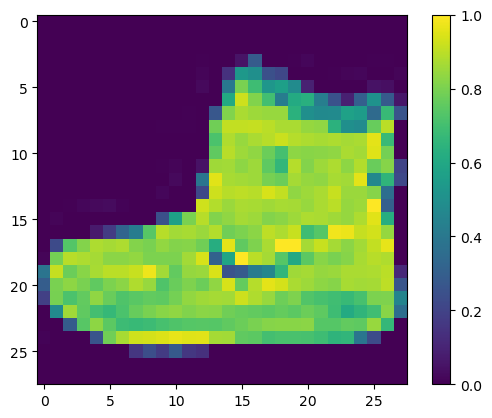

In [12]:
plt.figure()
plt.imshow(X_valid[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
model = keras.models.Sequential()

2022-09-23 22:48:32.459311: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [15]:
# Print the summary of the architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Get the weights and biases of first hidden layer with their shape
model.layers

In [17]:
hidden1 = model.layers[1]

In [18]:
hidden1.name

'dense'

In [19]:
model.get_layer('dense') is hidden1

True

In [20]:
weights, biases = hidden1.get_weights()

In [21]:
weights

array([[ 0.05531503,  0.06228836, -0.05813887, ..., -0.03615092,
         0.05958445, -0.04324343],
       [-0.01240852, -0.04184656, -0.01724176, ...,  0.06552482,
        -0.01957598,  0.05018605],
       [ 0.0225548 ,  0.03262837, -0.0124033 , ..., -0.01145136,
         0.06130454,  0.02943849],
       ...,
       [ 0.06094143, -0.07182863,  0.05900136, ...,  0.0279641 ,
        -0.02439542,  0.0529056 ],
       [ 0.03716772,  0.06665614,  0.00808755, ...,  0.01448037,
         0.01476362,  0.03685954],
       [-0.01433277,  0.01926198,  0.03575365, ...,  0.03071886,
         0.05699186,  0.06151976]], dtype=float32)

In [22]:
weights.shape

(784, 300)

In [23]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [24]:
biases.shape

(300,)

In [25]:
# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",metrics=["accuracy"])

In [26]:
# Train the model and store it in history variable
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7045 - accuracy: 0.7717 - val_loss: 0.4879 - val_accuracy: 0.8402
Epoch 2/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4812 - accuracy: 0.8331 - val_loss: 0.4920 - val_accuracy: 0.8330
Epoch 3/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4367 - accuracy: 0.8474 - val_loss: 0.4050 - val_accuracy: 0.8620
Epoch 4/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4097 - accuracy: 0.8557 - val_loss: 0.3975 - val_accuracy: 0.8600
Epoch 5/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3900 - accuracy: 0.8629 - val_loss: 0.3896 - val_accuracy: 0.8654
Epoch 6/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3757 - accuracy: 0.8677 - val_loss: 0.3747 - val_accuracy: 0.8726
Epoch 7/20
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3620 - accuracy: 0.8712 - val_loss: 0.3746 - val_accuracy:

In [27]:
import pandas as pd

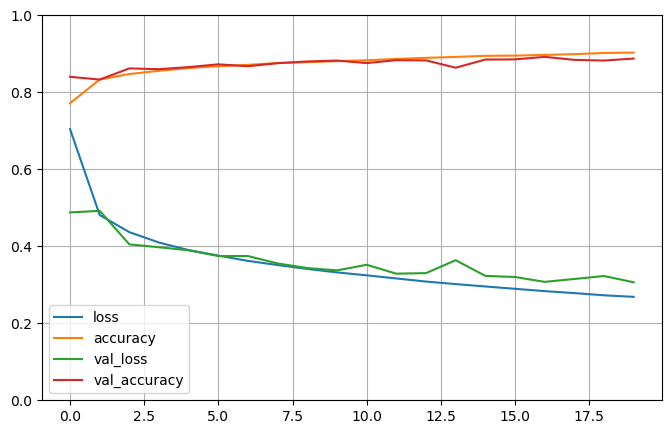

In [28]:
# Use matplotlib to graph the loss and accuracy for each epoch
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [29]:
# Evaluate the model on Test Data
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3445 - accuracy: 0.8714


[0.3445231020450592, 0.871399998664856]

In [30]:
# Create a variable X_new and store the first three data of X_test
X_new = X_test[:3]

In [31]:
# Use the trained model to predict the X_new data and store the result in y_proba
y_proba = model.predict(X_new)

1/1 [==============================] - 0s 64ms/step


In [32]:
# Use the trained model to predict the X_new data  by using predict_classes method and store the result in y_pred
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [33]:
import numpy as np
y_pred = model.predict(X_new)
classes_x=np.argmax(y_pred,axis=1)

1/1 [==============================] - 0s 17ms/step


In [34]:
y_pred

array([[1.5399208e-06, 1.2741317e-07, 1.6801024e-06, 2.8173049e-06,
        3.0240144e-06, 3.8726032e-03, 2.1940564e-06, 6.7320308e-03,
        2.2355559e-04, 9.8916048e-01],
       [1.3947881e-04, 1.4289317e-07, 9.8647004e-01, 1.1259738e-08,
        1.0676319e-02, 1.2862593e-10, 2.7130463e-03, 1.0080829e-12,
        9.4581247e-07, 1.2100676e-10],
       [5.2145766e-05, 9.9992728e-01, 1.0261713e-06, 1.6647757e-05,
        2.2269949e-06, 2.4132152e-08, 2.0699072e-07, 1.1028287e-09,
        5.0993799e-07, 1.5389183e-11]], dtype=float32)